# Number of Flights Data Analysis
### Fahmi F. Habib - Aerospace Engineering

#### Data analysis is made to find the correlation of Number of Flights with Covid-19 Phenomena. 
#### Flight data, Covid cases, and vaccination data are obtained from January 1, 2021 until November 28, 2021.
#### Flight data sources: https://www.flightradar24.com/data/statistics 
#### Covid case sources: https://ourworldindata.org/covid-cases 
#### Vaccination data sources: https://ourworldindata.org/covid-vaccinations 
#### Data from sources was processed by me.
#### Some important parameters such as Day# of pandemic, number of new and total cases, and number of people vaccinated.
#### ANN model is build to find the correlation between flight data and those important parameters.

#### Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel('flight_vs_covid_edit.xlsx')
df

,DateTime,Flights,MovingAvg,date,total_cases,new_cases,new_cases_per_billion,new_cases_smoothed,new_cases_smoothed_per_billion,Day,...,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred
0,2021-01-01,55951,68909,44197,84296831,566617,71723.670886,598028.429,75699.801139,340,...,2,204487,1040694,0.15,0.09,0.00,0.00,132,602177,0.008
1,2021-01-02,67204,69069,44198,84902473,605642,76663.544304,612020.286,77470.922278,341,...,2,1181993,1184117,0.17,0.11,0.00,0.00,150,745924,0.009
2,2021-01-03,74148,69390,44199,85425434,522961,66197.594937,624852.857,79095.298354,342,...,2,364723,1199126,0.17,0.11,0.00,0.00,152,760249,0.010
3,2021-01-04,73561,69661,44200,85975750,550316,69660.253165,633734.286,80219.529873,343,...,2,1130604,1249774,0.19,0.13,0.00,0.00,159,803559,0.010
4,2021-01-05,70386,69282,44201,86719564,743814,94153.670886,643933.857,81510.614810,344,...,2,2114689,1411230,0.21,0.14,0.00,0.00,179,835700,0.011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2021-11-24,95597,92954,44524,259467478,672616,85141.265823,569569.571,72097.414051,667,...,225756854,36999544,31796155,99.50,53.90,42.32,2.87,4038,26888496,0.341
328,2021-11-25,84696,91386,44525,260063320,595842,75423.037975,567100.143,71784.828228,668,...,230031719,28599022,31473844,99.86,53.98,42.45,2.92,3997,26709293,0.339
329,2021-11-26,86960,89667,44526,260660212,596892,75555.949367,564384.571,71441.084937,669,...,234168790,34894810,31785581,100.31,54.09,42.61,2.97,4036,8898368,0.113
330,2021-11-27,84404,89326,44527,261073662,413450,52335.443038,555353.286,70297.884304,670,...,237438402,27160757,30660648,100.65,54.17,42.71,3.02,3893,8311865,0.106


#### Defining input and output parameters

In [3]:
X = df.loc[:, ['total_cases', 'people_vaccinated', 'new_cases_smoothed']]
y = df.loc[:, ['MovingAvg']]

In [4]:
X

,total_cases,people_vaccinated,new_cases_smoothed
0,84296831,7375801,598028.429
1,84902473,8557196,612020.286
2,85425434,8920237,624852.857
3,85975750,9985978,633734.286
4,86719564,11185616,643933.857
...,...,...,...
327,259467478,4244279117,569569.571
328,260063320,4251125889,567100.143
329,260660212,4259854538,564384.571
330,261073662,4265942495,555353.286


In [5]:
y

,MovingAvg
0,68909
1,69069
2,69390
3,69661
4,69282
...,...
327,92954
328,91386
329,89667
330,89326


#### Plotting the parameters to see early correlation / hypothesis

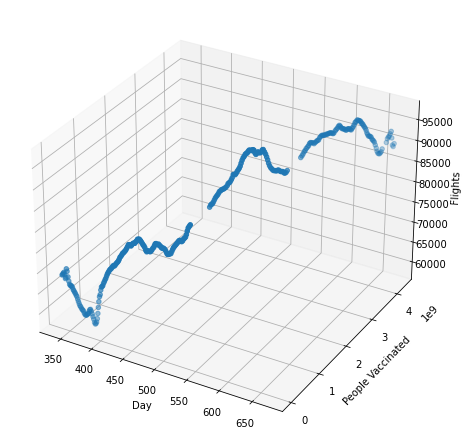

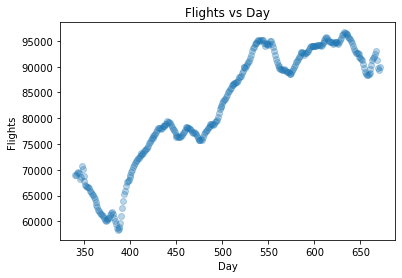

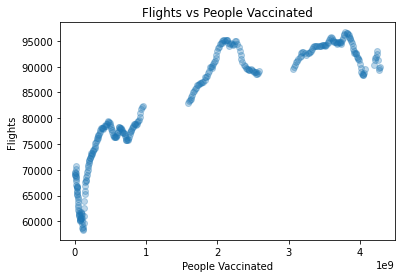

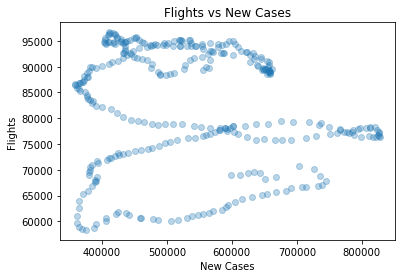

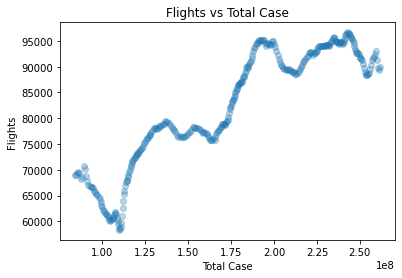

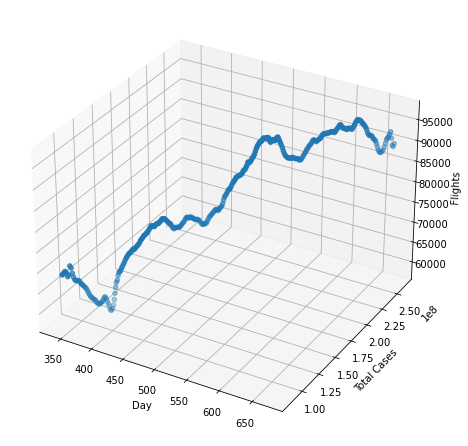

In [6]:
figcl = plt.figure(figsize = [6,6])
clplot = Axes3D(figcl)
clplot.scatter(df['Day'], df['people_vaccinated'], df['MovingAvg'])
clplot.set_xlabel('Day')
clplot.set_ylabel('People Vaccinated')
clplot.set_zlabel('Flights')
plt.show()

plt.scatter(df['Day'], df['MovingAvg'], alpha = 0.3)
plt.xlabel('Day')
plt.ylabel('Flights')
plt.title('Flights vs Day')
plt.show()

plt.scatter(df['people_vaccinated'], df['MovingAvg'], alpha = 0.3)
plt.xlabel('People Vaccinated')
plt.ylabel('Flights')
plt.title('Flights vs People Vaccinated')
plt.show()

plt.scatter(df['new_cases_smoothed'], df['MovingAvg'], alpha = 0.3)
plt.xlabel('New Cases')
plt.ylabel('Flights')
plt.title('Flights vs New Cases')
plt.show()

plt.scatter(df['total_cases'], df['MovingAvg'], alpha = 0.3)
plt.xlabel('Total Case')
plt.ylabel('Flights')
plt.title('Flights vs Total Case')
plt.show()

figFlights = plt.figure(figsize = [6,6])
clplot = Axes3D(figFlights)
clplot.scatter(df['Day'], df['total_cases'], df['MovingAvg'])
clplot.set_xlabel('Day')
clplot.set_ylabel('Total Cases')
clplot.set_zlabel('Flights')
plt.show()


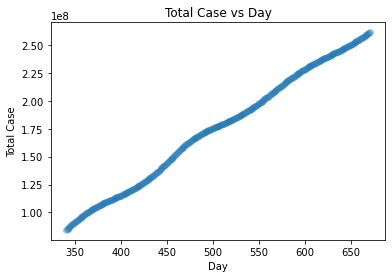

In [7]:
plt.scatter(df['Day'], df['total_cases'], alpha = 0.3)
plt.xlabel('Day')
plt.ylabel('Total Case')
plt.title('Total Case vs Day')
plt.show()

#### Splitting Data into train and test

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 29)

In [21]:
X_train

array([[5.19682593e-01, 3.73914526e-01, 5.63872114e-02],
       [1.08393520e-01, 1.34713428e-02, 3.82267951e-01],
       [2.27201547e-01, 6.64385345e-02, 2.95252970e-01],
       [9.25754930e-01, 9.15817983e-01, 1.56145139e-01],
       [7.96018405e-01, 7.74897682e-01, 4.77239983e-01],
       [8.23914625e-01, 8.06138861e-01, 3.45245657e-01],
       [5.01476306e-01, 2.05851112e-01, 2.26572213e-01],
       [6.48169308e-01, 5.22038039e-01, 4.82471922e-01],
       [9.67475241e-01, 9.50878083e-01, 2.78362208e-01],
       [5.44183376e-01, 4.08939116e-01, 1.44711932e-04],
       [3.10553788e-01, 1.13710349e-01, 8.08818244e-01],
       [5.83625041e-01, 4.62514965e-01, 1.41806078e-01],
       [8.42917267e-01, 8.26803382e-01, 2.48399995e-01],
       [9.22873066e-01, 9.12952821e-01, 1.50291913e-01],
       [1.38560714e-01, 2.21423887e-02, 1.01633083e-01],
       [4.71279974e-01, 1.81740208e-01, 5.20081919e-01],
       [8.42688958e-02, 9.16298487e-03, 5.24695318e-01],
       [6.08578765e-01, 4.86240

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scalery = MinMaxScaler()

In [10]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scalery.fit_transform(y_train)
y_test = scalery.transform(y_test)

#### ANN model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
NNmodel = Sequential()

NNmodel.add(Dense(27,activation='relu')) #Hidden Layer
#NNmodel.add(Dropout(0.2))
NNmodel.add(Dense(27,activation='relu')) #Hidden Layer
#NNmodel.add(Dropout(0.2))
NNmodel.add(Dense(3,activation='relu')) #Hidden Layer
#NNmodel.add(Dropout(0.2))

NNmodel.add(Dense(units = 1,activation='linear')) #Output Layer

NNmodel.compile(loss='mse', optimizer='adam')

In [13]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [14]:
NNmodel.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/1000
8/8 [==============================] - 0s 24ms/step - loss: 0.4624 - val_loss: 0.4324
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.4410 - val_loss: 0.4101
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.4169 - val_loss: 0.3849
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.3851 - val_loss: 0.3352
Epoch 5/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.2927 - val_loss: 0.1958
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1495 - val_loss: 0.0880
Epoch 7/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0643 - val_loss: 0.0525
Epoch 8/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0439 - val_loss: 0.0534
Epoch 9/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0409 - val_loss: 0.0447
Epoch 10/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0314 - val_loss: 0.0346
Epoch 11/1000
8/8 

Epoch 84/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0059 - val_loss: 0.0087
Epoch 85/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0086
Epoch 86/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.0087
Epoch 87/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0084
Epoch 88/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0086
Epoch 89/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0083
Epoch 90/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0082
Epoch 91/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0082
Epoch 92/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0081
Epoch 93/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0082
Epoch 94/1

8/8 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0068
Epoch 167/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0068
Epoch 168/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0068
Epoch 169/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0067
Epoch 170/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0073
Epoch 171/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0069
Epoch 172/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.0070
Epoch 173/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0067
Epoch 174/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0068
Epoch 175/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.0067
Epoch 176/1000


8/8 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0062
Epoch 249/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0040 - val_loss: 0.0063
Epoch 250/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0040 - val_loss: 0.0062
Epoch 251/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0065
Epoch 252/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0065
Epoch 253/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0062
Epoch 254/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0062
Epoch 255/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0063
Epoch 256/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0062
Epoch 257/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0039 - val_loss: 0.0061
Epoch 258/1000


8/8 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0055
Epoch 331/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0054
Epoch 332/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0055
Epoch 333/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0054
Epoch 334/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0053
Epoch 335/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.0054
Epoch 336/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0054
Epoch 337/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0053
Epoch 338/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0053
Epoch 339/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0058
Epoch 340/1000


8/8 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0040
Epoch 413/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0040
Epoch 414/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0038
Epoch 415/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0044
Epoch 416/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0039
Epoch 417/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0037
Epoch 418/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0040
Epoch 419/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0039
Epoch 420/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0036
Epoch 421/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0035
Epoch 422/1000


8/8 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 495/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 496/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 497/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 498/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 499/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 500/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 501/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 502/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 503/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 504/1000


8/8 [==============================] - 0s 2ms/step - loss: 8.5263e-04 - val_loss: 0.0013
Epoch 576/1000
8/8 [==============================] - 0s 2ms/step - loss: 8.1815e-04 - val_loss: 0.0013
Epoch 577/1000
8/8 [==============================] - 0s 2ms/step - loss: 8.3454e-04 - val_loss: 0.0013
Epoch 578/1000
8/8 [==============================] - 0s 2ms/step - loss: 8.5448e-04 - val_loss: 0.0014
Epoch 579/1000
8/8 [==============================] - 0s 2ms/step - loss: 8.2344e-04 - val_loss: 0.0013
Epoch 580/1000
8/8 [==============================] - 0s 2ms/step - loss: 8.4414e-04 - val_loss: 0.0013
Epoch 581/1000
8/8 [==============================] - 0s 2ms/step - loss: 7.9161e-04 - val_loss: 0.0014
Epoch 582/1000
8/8 [==============================] - 0s 3ms/step - loss: 8.1919e-04 - val_loss: 0.0013
Epoch 583/1000
8/8 [==============================] - 0s 2ms/step - loss: 8.0149e-04 - val_loss: 0.0012
Epoch 584/1000
8/8 [==============================] - 0s 3ms/step - loss: 8.630

8/8 [==============================] - 0s 2ms/step - loss: 6.1007e-04 - val_loss: 0.0010
Epoch 654/1000
8/8 [==============================] - 0s 3ms/step - loss: 6.6527e-04 - val_loss: 0.0011
Epoch 655/1000
8/8 [==============================] - 0s 2ms/step - loss: 7.4877e-04 - val_loss: 9.7506e-04
Epoch 656/1000
8/8 [==============================] - 0s 2ms/step - loss: 6.5919e-04 - val_loss: 9.0360e-04
Epoch 657/1000
8/8 [==============================] - ETA: 0s - loss: 4.4453e-0 - 0s 3ms/step - loss: 6.3251e-04 - val_loss: 8.9270e-04
Epoch 658/1000
8/8 [==============================] - 0s 2ms/step - loss: 5.5483e-04 - val_loss: 8.6219e-04
Epoch 659/1000
8/8 [==============================] - 0s 3ms/step - loss: 5.5219e-04 - val_loss: 8.3122e-04
Epoch 660/1000
8/8 [==============================] - 0s 2ms/step - loss: 6.6074e-04 - val_loss: 9.6290e-04
Epoch 661/1000
8/8 [==============================] - 0s 2ms/step - loss: 6.8399e-04 - val_loss: 8.4269e-04
Epoch 662/1000
8/8 [===

Epoch 729/1000
8/8 [==============================] - 0s 2ms/step - loss: 4.5586e-04 - val_loss: 7.0957e-04
Epoch 730/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.6770e-04 - val_loss: 6.6064e-04
Epoch 731/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.0433e-04 - val_loss: 8.7848e-04
Epoch 732/1000
8/8 [==============================] - 0s 2ms/step - loss: 5.4271e-04 - val_loss: 7.1140e-04
Epoch 733/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.3962e-04 - val_loss: 7.1025e-04
Epoch 734/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.1869e-04 - val_loss: 6.9414e-04
Epoch 735/1000
8/8 [==============================] - 0s 2ms/step - loss: 4.5485e-04 - val_loss: 7.7022e-04
Epoch 736/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.3762e-04 - val_loss: 0.0012
Epoch 737/1000
8/8 [==============================] - 0s 2ms/step - loss: 6.5601e-04 - val_loss: 9.5313e-04
Epoch 738/1000
8/8 [============

8/8 [==============================] - 0s 2ms/step - loss: 4.1179e-04 - val_loss: 6.4546e-04
Epoch 805/1000
8/8 [==============================] - 0s 2ms/step - loss: 3.7545e-04 - val_loss: 5.9481e-04
Epoch 806/1000
8/8 [==============================] - 0s 2ms/step - loss: 4.4670e-04 - val_loss: 6.3299e-04
Epoch 807/1000
8/8 [==============================] - 0s 2ms/step - loss: 3.9511e-04 - val_loss: 6.3993e-04
Epoch 808/1000
8/8 [==============================] - 0s 2ms/step - loss: 4.3653e-04 - val_loss: 6.0731e-04
Epoch 809/1000
8/8 [==============================] - 0s 2ms/step - loss: 3.9484e-04 - val_loss: 6.0495e-04
Epoch 810/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.4745e-04 - val_loss: 5.7226e-04
Epoch 811/1000
8/8 [==============================] - 0s 2ms/step - loss: 3.7547e-04 - val_loss: 5.6703e-04
Epoch 812/1000
8/8 [==============================] - 0s 2ms/step - loss: 3.5206e-04 - val_loss: 6.5849e-04
Epoch 813/1000
8/8 [=======================

8/8 [==============================] - 0s 2ms/step - loss: 3.5172e-04 - val_loss: 5.4653e-04
Epoch 880/1000
8/8 [==============================] - 0s 2ms/step - loss: 3.9010e-04 - val_loss: 5.3879e-04
Epoch 881/1000
8/8 [==============================] - 0s 2ms/step - loss: 3.1011e-04 - val_loss: 5.7083e-04
Epoch 882/1000
8/8 [==============================] - 0s 2ms/step - loss: 3.4497e-04 - val_loss: 5.7705e-04
Epoch 883/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.4095e-04 - val_loss: 5.7466e-04
Epoch 884/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.0959e-04 - val_loss: 5.5967e-04
Epoch 885/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.0471e-04 - val_loss: 5.3006e-04
Epoch 886/1000
8/8 [==============================] - 0s 2ms/step - loss: 3.3720e-04 - val_loss: 6.4704e-04
Epoch 887/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.9140e-04 - val_loss: 5.3581e-04
Epoch 888/1000
8/8 [=======================

<AxesSubplot:>

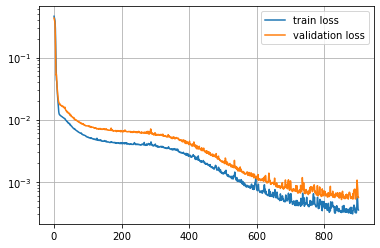

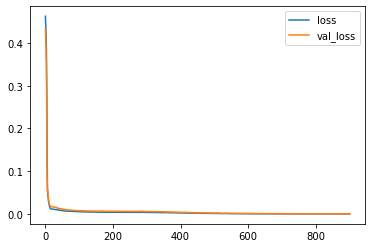

In [15]:
losses = pd.DataFrame(NNmodel.history.history)
plt.grid()
plt.yscale("log")
plt.plot(losses['loss'], label='train loss')
plt.plot(losses['val_loss'], label='validation loss')
plt.legend()
losses[['loss', 'val_loss']].plot()

#### Building predictions and evaluation

In [16]:
predictions = NNmodel.predict(X_test)

In [17]:
predictions = scalery.inverse_transform(predictions)
y_test = scalery.inverse_transform(y_test)

In [18]:
mse_MovingAvg = mean_squared_error(y_test[:,0], predictions[:,0])
print(f"Mean Squared Error for MovingAvg: {mse_MovingAvg}")
mae_MovingAvg = np.sum(np.absolute(y_test[:,0]- predictions[:,0]))/len(y_test)
print(f"Mean Absolute Error for MovingAvg: {mae_MovingAvg}\n")

Mean Squared Error for MovingAvg: 800820.6633529669
Mean Absolute Error for MovingAvg: 684.7441406250001



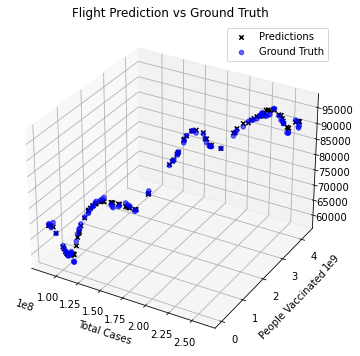

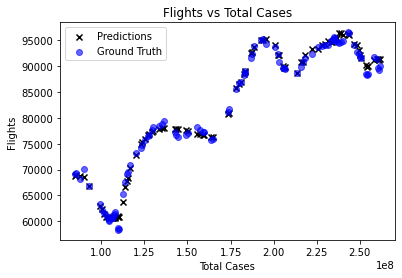

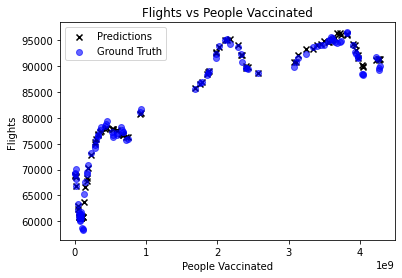

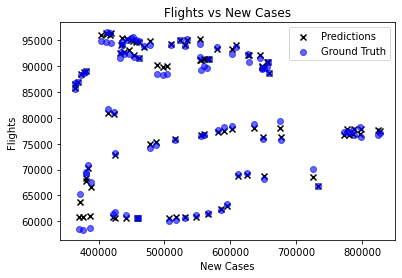

In [19]:
# Creating figure Cl
fig = plt.figure(figsize = (8, 6))
visual_split = plt.axes(projection ="3d")
 
# Creating plot
visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], y_test[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.title("Flight Prediction vs Ground Truth")
plt.xlabel('Total Cases')
plt.ylabel('People Vaccinated')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(X_test)[:,0], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_test)[:,0], y_test[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.xlabel('Total Cases')
plt.ylabel('Flights')
plt.title('Flights vs Total Cases')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(X_test)[:,1], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_test)[:,1], y_test[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.xlabel('People Vaccinated')
plt.ylabel('Flights')
plt.title('Flights vs People Vaccinated')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(X_test)[:,2], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_test)[:,2], y_test[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.xlabel('New Cases')
plt.ylabel('Flights')
plt.title('Flights vs New Cases')
plt.legend()
plt.show()

In [20]:
sample_number = 6
#alldata=len(predictions)
print("[Flight]")
for i in range (sample_number):
    print(f"Sample Data {i+1}: {y_test[i]}")
    print(f"Prediction {i+1}: {predictions[i]}")
    error = np.abs(y_test[i]-predictions[i])
    print(f"error: {error}\n--------------------------------------------------")


[Flight]
Sample Data 1: [61281.]
Prediction 1: [60919.33]
error: [361.671875]
--------------------------------------------------
Sample Data 2: [95246.]
Prediction 2: [95063.984]
error: [182.015625]
--------------------------------------------------
Sample Data 3: [88739.]
Prediction 3: [88684.33]
error: [54.671875]
--------------------------------------------------
Sample Data 4: [58457.]
Prediction 4: [60925.074]
error: [2468.07421875]
--------------------------------------------------
Sample Data 5: [92329.]
Prediction 5: [92121.6]
error: [207.3984375]
--------------------------------------------------
Sample Data 6: [90911.]
Prediction 6: [92111.87]
error: [1200.8671875]
--------------------------------------------------
